Початковий інтеграл:


1.7          
 ⌠           
 ⎮  cos(x)   
 ⎮  ────── dx
 ⎮  x + 1    
 ⌡           
0.8          

Simpson integration formula:


                              ⎛                    n                          
                              ⎜                   ___                         
                              ⎜                   ╲                           
                    ⎛  a   b⎞ ⎜                    ╲                          
                    ⎜- ─ + ─⎟⋅⎜y[0] + y[2*n] + 2⋅  ╱   (2⋅y[2*i - 1] + y[2*i])
                    ⎝  6   6⎠ ⎜                   ╱                           
                              ⎜                   ‾‾‾                         
                              ⎝                  i = 1                        
\int_a__b f(x) dx = ──────────────────────────────────────────────────────────
                                                 n                            

⎞
⎟
⎟
⎟
⎟
⎟
⎟
⎠
─
 

Gauss integration formula:


      m               
     ___              
     ╲                
      ╲               
I =   ╱   f(x[i])⋅A[i]
     ╱                
     ‾‾‾              
    i = 1             

Legendre polynomials:


  m                            
 ___                           
 ╲                             
  ╲                     k-1    
  ╱   Lₘ(x[i])⋅A[i]⋅x[i]    = 0
 ╱                             
 ‾‾‾                           
i = 1                          

False

Integration results:


I_{library} = 0.134967838396775

I_{Simpson} = 0.136080982211271

I_{Gauss} = 0.134967838396775

Original function:


       cos(x)
f(x) = ──────
       x + 1 

Fourth derivative:


                ⎛   3       2            ⎞          ⎛ 4      3      2         
              - ⎝4⋅x  + 12⋅x  - 12⋅x - 20⎠⋅sin(x) + ⎝x  + 4⋅x  - 6⋅x  - 20⋅x +
f__{(4)}(x) = ────────────────────────────────────────────────────────────────
                                                       5                      
                                                (x + 1)                       

   ⎞       
 13⎠⋅cos(x)
───────────
           
           

Simpson integral error formula:


         │       5 ⎛⎛   3       2            ⎞          ⎛ 4      3      2     
         │(a - b) ⋅⎝⎝4⋅x  + 12⋅x  - 12⋅x - 20⎠⋅sin(x) - ⎝x  + 4⋅x  - 6⋅x  - 20
         │────────────────────────────────────────────────────────────────────
         │                                     4        5                     
         │                                    n ⋅(x + 1)                      
R_4(f) = ─────────────────────────────────────────────────────────────────────
                                                  180                         

       ⎞       ⎞│
⋅x + 13⎠⋅cos(x)⎠│
────────────────│
                │
                │
─────────────────
                 

R_4(f) = 7.59687822490254e-6

Gauss integral error formula:


         │          m - 1 ⎛⎛   3       2            ⎞          ⎛ 4      3     
         │(-(a - b))     ⋅⎝⎝4⋅ξ  + 12⋅ξ  - 12⋅ξ - 20⎠⋅sin(ξ) - ⎝ξ  + 4⋅ξ  - 6⋅
R_m(f) = │────────────────────────────────────────────────────────────────────
         │                                                    5       3       
         │                                   (2⋅m + 1)⋅(ξ + 1) ⋅(2⋅m)!        

 2            ⎞       ⎞   4│
ξ  - 20⋅ξ + 13⎠⋅cos(ξ)⎠⋅m! │
───────────────────────────│
                           │
                           │

R_m(f) = 2.37250446428571e-7

Error between Simpson integral and library result: 0.001113143814496259
Error between Gauss integral and library result: 0.0


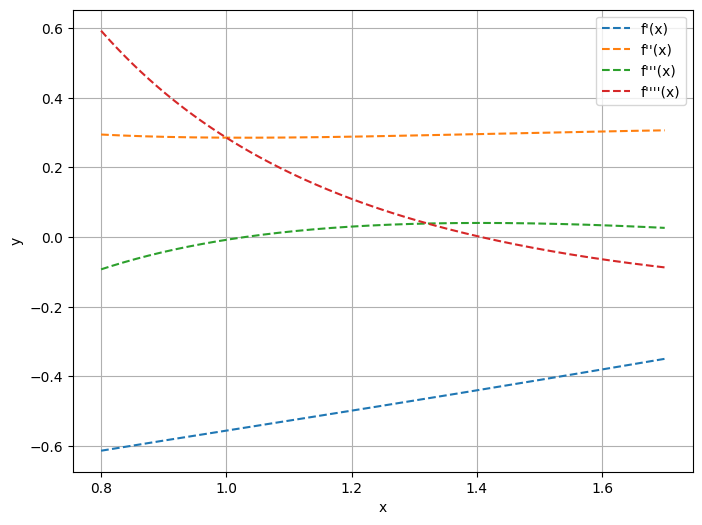

In [35]:
import numpy as np
from scipy.integrate import quad
from math import factorial
import matplotlib.pyplot as plt
import sympy as sp

sp.init_printing(use_latex='mathjax')

np.set_printoptions(precision=5)

INTEGRATION_RANGE = 0.8, 1.7
PRECISION = 0.0001

# Виведення початкового інтегралу як формули LaTeX
x = sp.Symbol('x')
f_expr = sp.cos(x) / (x + 1)
print("Початковий інтеграл:")
display(sp.Integral(f_expr, (x, *INTEGRATION_RANGE)))

def simpson_integral(f, a, b, eps):
    """
    Метод Сімпсона для обчислення інтегралу.

    Формула Сімпсона:
    ∫_a^b f(x) dx ≈ (b-a)/(6n) * [2∑_{i=1}^n (2y_{2i-1} + y_{2i}) + y_0 + y_{2n}]

    Оцінка похибки:
    |R_4(f)| ≤ ((b-a)^5) / (180n^4) * max_{x∈[a,b]} |f^{(4)}(x)|

    Параметри:
    - f: функція для інтегрування
    - a, b: межі інтегрування
    - eps: бажана точність

    Повертає:
    - значення інтегралу
    - оцінку похибки
    """
    n = 2  # початкова кількість інтервалів
    while True:
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = np.trapz(y, x=x)
        # Оцінка похибки для методу Сімпсона
        h = (b - a) / n
        maximum = np.max(np.abs(f_prime_4(np.linspace(a, b, 100))))
        error = (((b - a) * h ** 4) / 180) * maximum
        if error < eps:
            break
        n *= 2  # збільшення кількості інтервалів
    return integral, error

# Обчислення інтегралу методом Гауса
def gauss_integral(f, a, b, eps):
    """
    Метод Гауса для обчислення інтегралу.

    Формула Гауса:
    I = ∑_{i=1}^m A_i * f(x_i)

    Оцінка похибки:
    |R_m(f)| ≤ ((m!)^4 * (b-a)^(m-1)) / ((2m+1) * [(2m)!]^3) * max_{ξ∈[a,b]} |f^{(2m)}(ξ)|

    Параметри:
    - f: функція для інтегрування
    - a, b: межі інтегрування
    - eps: бажана точність

    Повертає:
    - значення інтегралу
    - оцінку похибки
    """
    # Використання scipy quad для обчислення інтегралу Гауса з заданою точністю
    integral, error = quad(f, a, b, epsabs=eps)
    # Оцінка похибки для методу Гауса
    m = 2  # початкова кількість точок
    while True:
        r_expr = (factorial(m) ** 4 * (b - a) ** (2 * m + 1)) / ((2 * m + 1) * factorial(2 * m) ** 3)
        if r_expr < eps:
            break
        m += 1
    return integral, r_expr

def f(x):
    return np.cos(x) / (x + 1)

def f_prime1(x):
    return -((x + 1) * np.sin(x) + np.cos(x)) / (x + 1) ** 2

def f_prime2(x):
    return (2 * (x + 1) * np.sin(x) - (x ** 2 + 2 * x - 1) * np.cos(x)) / (x + 1) ** 3

def f_prime3(x):
    return (3 * (x ** 2 + 2 * x - 1) * np.cos(x) + (x ** 3 + 3 * x ** 2 - 3 * x - 5) * np.sin(x)) / (x + 1) ** 4

def f_prime_4_sympy(x):
    return ((x ** 4 + 4 * x ** 3 - 6 * x ** 2 - 20 * x + 13) * sp.cos(x) - 4 * (x ** 3 + 3 * x ** 2 - 3 * x - 5) * sp.sin(x)) / (x + 1) ** 5

def f_prime_4(x):
    return ((x ** 4 + 4 * x ** 3 - 6 * x ** 2 - 20 * x + 13) * np.cos(x) - 4 * (x ** 3 + 3 * x ** 2 - 3 * x - 5) * np.sin(x)) / (x + 1) ** 5

# Обчислення інтегралу за допомогою бібліотечної функції
library_result, _ = quad(f, *INTEGRATION_RANGE)

# Обчислення інтегралу методом Сімпсона та методом Гауса
simpson_result, simpson_error = simpson_integral(f, *INTEGRATION_RANGE, PRECISION)
gauss_result, gauss_error = gauss_integral(f, *INTEGRATION_RANGE, PRECISION)

# Обчислення похибок
simpson_library_error = abs(simpson_result - library_result)
gauss_library_error = abs(gauss_result - library_result)

# Відображення формул інтегрування методом Сімпсона та Гауса
print("Simpson integration formula:")
display(sp.Eq(sp.Symbol(r'\int_a^b f(x) dx'), sp.Rational(1, 6) * (b - a) / sp.Symbol('n') * (2 * sp.Sum(2 * sp.IndexedBase('y')[2*sp.Symbol('i')-1] + sp.IndexedBase('y')[2*sp.Symbol('i')], (sp.Symbol('i'), 1, sp.Symbol('n'))) + sp.IndexedBase('y')[0] + sp.IndexedBase('y')[2*sp.Symbol('n')])))

print("Gauss integration formula:")
display(sp.Eq(sp.Symbol('I'), sp.Sum(sp.IndexedBase('A')[sp.Symbol('i')] * sp.Function('f')(sp.IndexedBase('x')[sp.Symbol('i')]), (sp.Symbol('i'), 1, sp.Symbol('m')))))

print("Legendre polynomials:")
display(sp.Eq(sp.Sum(sp.IndexedBase('x')[sp.Symbol('i')]**sp.Symbol('k-1') * sp.IndexedBase('A')[sp.Symbol('i')] * sp.Function('L_m')(sp.IndexedBase('x')[sp.Symbol('i')]), (sp.Symbol('i'), 1, sp.Symbol('m'))), 0))
display(sp.Eq(sp.Symbol('k'), sp.Range(1, sp.Symbol('m'))))

# Відображення результатів інтегрування у форматі LaTeX
print("Integration results:")
display(sp.Eq(sp.Symbol('I_{library}'), library_result))
display(sp.Eq(sp.Symbol('I_{Simpson}'), simpson_result))
display(sp.Eq(sp.Symbol('I_{Gauss}'), gauss_result))

# Відображення оригінальної функції та її четвертої похідної
x = sp.Symbol('x')
original_function = sp.cos(x) / (x + 1)
fourth_derivative = f_prime_4_sympy(x)
print("Original function:")
display(sp.Eq(sp.Symbol('f(x)'), original_function))
print("Fourth derivative:")
display(sp.Eq(sp.Symbol('f^{(4)}(x)'), fourth_derivative))

# Відображення формули похибки для методу Сімпсона
a, b, n = sp.symbols('a b n')
simpson_error_formula = sp.Abs(sp.Rational(1, 180) * (b - a)**5 * fourth_derivative / n**4)
print("Simpson integral error formula:")
display(sp.Eq(sp.Symbol('R_4(f)'), simpson_error_formula))
display(sp.Eq(sp.Symbol('R_4(f)'), simpson_error))

# Відображення формули похибки для методу Гауса
m, ξ = sp.symbols('m ξ')
gauss_error_formula = sp.Abs(sp.factorial(m)**4 * (b - a)**(m - 1) / (sp.factorial(2*m)**3 * (2*m + 1)) * fourth_derivative.subs(x, ξ))
print("Gauss integral error formula:")
display(sp.Eq(sp.Symbol('R_m(f)'), gauss_error_formula))
display(sp.Eq(sp.Symbol('R_m(f)'), gauss_error))

print("Error between Simpson integral and library result:", simpson_library_error)
print("Error between Gauss integral and library result:", gauss_library_error)

# Plotting the derivatives
plt.figure(figsize=(8, 6))
x_vals = np.linspace(*INTEGRATION_RANGE, 10000)
plt.plot(x_vals, f_prime1(x_vals), label="f'(x)", ls='--')
plt.plot(x_vals, f_prime2(x_vals), label="f''(x)", ls='--')
plt.plot(x_vals, f_prime3(x_vals), label="f'''(x)", ls='--')
plt.plot(x_vals, f_prime_4(x_vals), label="f''''(x)", ls='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()